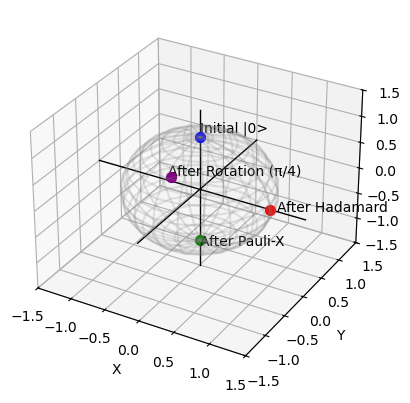

In [66]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize the qubit in the |0> state
initial_state = basis(2, 0)  # |0> state in a 2D Hilbert space

# Define quantum gates
hadamard_gate = (qeye(2) + sigmax()) / np.sqrt(2)  # Hadamard gate: creates superposition
pauli_x_gate = sigmax()  # Pauli-X gate: performs a NOT operation
theta = np.pi / 4  # Rotation angle for x-axis rotation
rotation_gate = np.cos(theta / 2) * qeye(2) - 1j * np.sin(theta / 2) * sigmax()  # Rx(θ) = cos(θ/2)I - i*sin(θ/2)σx

# Apply gates to the initial state
state_after_hadamard = hadamard_gate * initial_state  # State after applying Hadamard gate
state_after_pauli_x = pauli_x_gate * initial_state   # State after applying Pauli-X gate
state_after_rotation = rotation_gate * initial_state  # State after applying rotation gate

# Define states, labels, and colors for visualization
states = [initial_state, state_after_hadamard, state_after_pauli_x, state_after_rotation]
labels = ['Initial |0>', 'After Hadamard', 'After Pauli-X', 'After Rotation (π/4)']
colors = ['blue', 'red', 'green', 'purple']  # Colors for each state

# Calculate Bloch sphere coordinates for each state
points = []
for state in states:
    # Compute expectation values for Pauli operators
    x = qt.expect(qt.sigmax(), state)
    y = qt.expect(qt.sigmay(), state)
    z = qt.expect(qt.sigmaz(), state)
    points.append([x, y, z])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the Bloch sphere (wireframe)
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x, y, z, color='gray', alpha=0.2)  # Plot sphere

# Plot coordinate axes
ax.plot([-1.5, 1.5], [0, 0], [0, 0], color='black', linestyle='-', linewidth=1)  # X-axis
ax.plot([0, 0], [-1.5, 1.5], [0, 0], color='black', linestyle='-', linewidth=1)  # Y-axis
ax.plot([0, 0], [0, 0], [-1.5, 1.5], color='black', linestyle='-', linewidth=1)  # Z-axis

# Plot points with custom colors
for i, (point, label, color) in enumerate(zip(points, labels, colors)):
    ax.scatter([point[0]], [point[1]], [point[2]], c=color, s=50, marker='o')  # Plot point
    ax.text(point[0] * 1.1, point[1] * 1.1, point[2] * 1.1, label, fontsize=10)  # Add label

# Customize the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Save and display the plot
plt.savefig('bloch_sphere.png', dpi=300, bbox_inches='tight')  # Save as high-quality image
plt.show()